In [1]:
#Classifier takes integers and regressor takes floats
import pandas as pd
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB   
import statsmodels.api as sm
pd.set_option('display.max_columns', None)

In [2]:
path = "resources/telecom_cleaned.csv"
df = pd.read_csv(path)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5972,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5973,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5974,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [3]:
#Dropping based on no internet service
df.drop(df.loc[df['OnlineSecurity']=='No internet service'].index, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50
5,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55
5970,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10
5971,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5972,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30


In [4]:
#inverse_transform(y) <-- How to turn labels back
label = LabelEncoder()
df = pd.get_dummies(df)


In [5]:
#Correlation matrix
corrMatrix = df.corr()
corrMatrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,-0.010563,0.125789,0.024938,0.013170,-0.013170,-0.017146,0.017146,0.210628,-0.210628,-0.043601,0.043601,-0.074323,-0.043601,0.101599,-0.200754,0.200754,0.109098,-0.109098,0.008116,-0.008116,0.009316,-0.009316,0.136031,-0.136031,-0.029881,0.029881,-0.044983,0.044983,0.124607,-0.046038,-0.107685,-0.119536,0.119536,-0.025954,-0.037350,0.135489,-0.110904
tenure,-0.010563,1.000000,0.380013,0.932021,-0.006430,0.006430,-0.392949,0.392949,-0.178744,0.178744,-0.019292,0.019292,-0.328564,-0.019292,0.334185,-0.007842,0.007842,-0.381444,0.381444,-0.418079,0.418079,-0.424565,0.424565,-0.377974,0.377974,-0.331602,0.331602,-0.346414,0.346414,-0.683410,0.269682,0.572962,0.007383,-0.007383,0.227736,0.242240,-0.252124,-0.193767
MonthlyCharges,0.125789,0.380013,1.000000,0.618188,0.018226,-0.018226,-0.180160,0.180160,0.013473,-0.013473,-0.600435,0.600435,-0.161153,-0.600435,0.555569,-0.754060,0.754060,-0.084038,0.084038,-0.256858,0.256858,-0.322854,0.322854,-0.142779,0.142779,-0.531258,0.531258,-0.524975,0.524975,-0.191879,0.064350,0.172535,-0.200034,0.200034,0.069794,0.051101,0.092365,-0.262025
TotalCharges,0.024938,0.932021,0.618188,1.000000,0.001908,-0.001908,-0.374408,0.374408,-0.140488,0.140488,-0.200852,0.200852,-0.329017,-0.200852,0.454954,-0.234475,0.234475,-0.338799,0.338799,-0.427643,0.427643,-0.446893,0.446893,-0.360052,0.360052,-0.431897,0.431897,-0.442958,0.442958,-0.622613,0.231470,0.536586,-0.052891,0.052891,0.200220,0.212479,-0.187699,-0.215615
gender_Female,0.013170,-0.006430,0.018226,0.001908,1.000000,-1.000000,0.019513,-0.019513,0.012639,-0.012639,-0.007790,0.007790,0.006612,-0.007790,-0.001305,-0.011700,0.011700,-0.023827,0.023827,-0.020656,0.020656,-0.002818,0.002818,-0.010235,0.010235,-0.008438,0.008438,-0.008261,0.008261,0.004653,-0.008343,0.002776,-0.018698,0.018698,0.013589,0.003695,-0.007377,-0.009719
gender_Male,-0.013170,0.006430,-0.018226,-0.001908,-1.000000,1.000000,-0.019513,0.019513,-0.012639,0.012639,0.007790,-0.007790,-0.006612,0.007790,0.001305,0.011700,-0.011700,0.023827,-0.023827,0.020656,-0.020656,0.002818,-0.002818,0.010235,-0.010235,0.008438,-0.008438,0.008261,-0.008261,-0.004653,0.008343,-0.002776,0.018698,-0.018698,-0.013589,-0.003695,0.007377,0.009719
Partner_No,-0.017146,-0.392949,-0.180160,-0.374408,0.019513,-0.019513,1.000000,-1.000000,0.417896,-0.417896,0.029356,-0.029356,0.134425,0.029356,-0.150949,0.009161,-0.009161,0.183726,-0.183726,0.183857,-0.183857,0.186723,-0.186723,0.151266,-0.151266,0.161764,-0.161764,0.151542,-0.151542,0.287885,-0.108894,-0.246192,-0.011410,0.011410,-0.101545,-0.109638,0.103146,0.100751
Partner_Yes,0.017146,0.392949,0.180160,0.374408,-0.019513,0.019513,-1.000000,1.000000,-0.417896,0.417896,-0.029356,0.029356,-0.134425,-0.029356,0.150949,-0.009161,0.009161,-0.183726,0.183726,-0.183857,0.183857,-0.186723,0.186723,-0.151266,0.151266,-0.161764,0.161764,-0.151542,0.151542,-0.287885,0.108894,0.246192,0.011410,-0.011410,0.101545,0.109638,-0.103146,-0.100751
Dependents_No,0.210628,-0.178744,0.013473,-0.140488,0.012639,-0.012639,0.417896,-0.417896,1.000000,-1.000000,-0.028763,0.028763,0.009525,-0.028763,0.009745,-0.133308,0.133308,0.163391,-0.163391,0.097082,-0.097082,0.079948,-0.079948,0.142818,-0.142818,0.051965,-0.051965,0.028510,-0.028510,0.2083

In [6]:
#Notes: Dropped no internet, so only two internet options
        #Dropped multiple lines because multicollinearity with phone service (yes/no)
        #Didn't include contracts or payment methods because multiple options
df_test=df[['SeniorCitizen', 'tenure', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
            'InternetService_Fiber optic', 'InternetService_DSL','OnlineSecurity_Yes', 'OnlineBackup_Yes',
           'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
           'StreamingMovies_Yes', 'PaperlessBilling_Yes']]
df_test

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
1,0,44,0,0,0,1,1,0,0,1,1,0,1,0,1
2,1,38,0,1,0,1,1,0,0,0,0,0,0,0,1
3,0,4,1,0,0,1,0,1,0,0,0,0,0,1,1
4,0,2,1,0,0,1,0,1,1,0,1,0,0,0,0
5,0,70,0,1,0,0,0,1,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,0,72,1,1,1,1,0,1,1,1,1,1,1,1,1
5970,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
5971,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1
5972,0,23,0,1,1,1,0,1,1,1,1,1,1,1,1


In [7]:
corrMatrix = df_test.corr()
corrMatrix

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
SeniorCitizen,1.000000,-0.010563,-0.013170,0.017146,-0.210628,0.043601,0.200754,-0.200754,-0.109098,-0.008116,-0.009316,-0.136031,0.029881,0.044983,0.119536
tenure,-0.010563,1.000000,0.006430,0.392949,0.178744,0.019292,0.007842,-0.007842,0.381444,0.418079,0.424565,0.377974,0.331602,0.346414,-0.007383
gender_Male,-0.013170,0.006430,1.000000,0.019513,0.012639,-0.007790,-0.011700,0.011700,-0.023827,-0.020656,-0.002818,-0.010235,-0.008438,-0.008261,-0.018698
Partner_Yes,0.017146,0.392949,0.019513,1.000000,0.417896,0.029356,0.009161,-0.009161,0.183726,0.183857,0.186723,0.151266,0.161764,0.151542,-0.011410
Dependents_Yes,-0.210628,0.178744,0.012639,0.417896,1.000000,-0.028763,-0.133308,0.133308,0.163391,0.097082,0.079948,0.142818,0.051965,0.028510,-0.084064
PhoneService_Yes,0.043601,0.019292,-0.007790,0.029356,-0.028763,1.000000,0.427084,-0.427084,-0.033155,0.018912,-0.006216,-0.033218,0.056244,0.046432,0.092748
InternetService_Fiber optic,0.200754,0.007842,-0.011700,0.009161,-0.133308,0.427084,1.000000,-1.000000,-0.214223,-0.013600,-0.003582,-0.205505,0.166913,0.151769,0.241282
InternetService_DSL,-0.200754,-0.007842,0.011700,-0.009161,0.133308,-0.427084,-1.000000,1.000000,0.214223,0.013600,0.003582,0.205505,-0.166913,-0.151769,-0.241282
OnlineSecurity_Yes,-0.109098,0.381444,-0.023827,0.183726,0.163391,-0.033155,-0.214223,0.214223,1.000000,0.182442,0.179866,0.270786,0.057581,0.070196,-0.129131
OnlineBackup_Yes,-0.008116,0.418079,-0.020656,0.183857,0.097082,0.018912,-0.013600,0.013600,0.182442,1.000000,0.189440,0.184389,0.147937,0.146565,0.000835


In [8]:
X = df_test

y = df ["MonthlyCharges"]

X

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
1,0,44,0,0,0,1,1,0,0,1,1,0,1,0,1
2,1,38,0,1,0,1,1,0,0,0,0,0,0,0,1
3,0,4,1,0,0,1,0,1,0,0,0,0,0,1,1
4,0,2,1,0,0,1,0,1,1,0,1,0,0,0,0
5,0,70,0,1,0,0,0,1,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,0,72,1,1,1,1,0,1,1,1,1,1,1,1,1
5970,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
5971,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1
5972,0,23,0,1,1,1,0,1,1,1,1,1,1,1,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [10]:
#Rachel's code
model=LinearRegression()

In [11]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9884209884415448
Testing Score: 0.9877392739430159


Text(0.5, 1.0, 'Residual Plot')

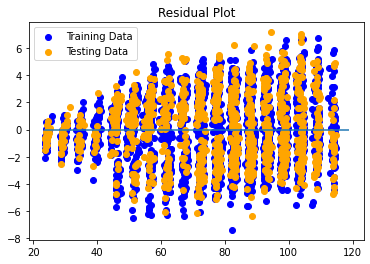

In [12]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [13]:
# #DROPPING DeviceProtection_No internet service to test
# df3 = df2.drop(columns=['DeviceProtection_No internet service'])


In [14]:
def calculate_vif(df):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = df.columns
    for i in range(0, x_var_names.shape[0]):
        y = df[x_var_names[i]]
        x = df[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

# X=df.drop(['Salary'],axis=1)
calculate_vif(X)

,Var,Vif
1,tenure,1.96
3,Partner_Yes,1.41
13,StreamingMovies_Yes,1.36
12,StreamingTV_Yes,1.35
4,Dependents_Yes,1.31
10,DeviceProtection_Yes,1.29
8,OnlineSecurity_Yes,1.28
11,TechSupport_Yes,1.28
5,PhoneService_Yes,1.24
9,OnlineBackup_Yes,1.22


In [15]:
sc =  StandardScaler()
X_scaler = sc.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

X_train

array([[-0.4970669 ,  1.54745925, -1.01316223, ...,  1.03059868,
        -0.98420657,  0.68744649],
       [-0.4970669 , -0.89604369, -1.01316223, ...,  1.03059868,
        -0.98420657,  0.68744649],
       [-0.4970669 ,  1.30310896,  0.98700877, ...,  1.03059868,
         1.01604687, -1.45465868],
       ...,
       [-0.4970669 ,  0.04063244,  0.98700877, ..., -0.9703098 ,
         1.01604687,  0.68744649],
       [ 2.01180162,  0.61078312,  0.98700877, ...,  1.03059868,
         1.01604687,  0.68744649],
       [-0.4970669 , -1.30329417, -1.01316223, ..., -0.9703098 ,
        -0.98420657, -1.45465868]])

# Linear Regression

In [16]:
line = LinearRegression()
line.fit(X_train, y_train)


pred_line = line.predict(X_train)
mse = mean_squared_error(y_train, pred_line)
r2 = r2_score(y_train, pred_line)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 5.591726359583298
R-squared (R2 ): 0.9884209884415448


In [17]:
line.score(X_test, y_test)

0.9877392739430155